In [38]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt   #Data visualisation libraries 
import sklearn
from sklearn.model_selection import cross_val_score
# Sci-kit Learn Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
# Metrics
from sklearn.metrics import mean_squared_error
from pprint import pprint
import copy
from sklearn.model_selection import ParameterGrid

In [25]:
loan_df = pd.read_csv('D:\Academic\Data Science\lc_data/cleaned_data.csv')
loan_df.head(5)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,acc_now_delinq
0,0,5000.0,5000.0,4975.0,1,10.65,162.87,2,7,6,...,0.00,0.00,171.62,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
1,1,2500.0,2500.0,2500.0,2,15.27,59.83,3,14,6,...,117.08,1.11,119.66,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
2,2,2400.0,2400.0,2400.0,1,15.96,84.33,3,15,6,...,0.00,0.00,649.91,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
3,3,10000.0,10000.0,10000.0,1,13.49,339.31,3,11,6,...,0.00,0.00,357.48,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
4,4,3000.0,3000.0,3000.0,2,12.69,67.79,2,10,6,...,0.00,0.00,67.79,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0


In [26]:
# Labels (y_true of this dataset)
y = loan_df.pop("int_rate")

In [27]:
train = int(len(loan_df) * 0.60)
val = int(len(loan_df) * 0.20)
test = int(len(loan_df) * 0.20)

In [28]:
def cross_validate(clf, df, test_x, test_y, k = 5) :
  # Build the metric dict.
  metric = {"train":{"mse": [], "score": []},
            "val" : {"mse": [], "score": []},
            "test" :{"mse": [], "score": []}};

  split = int(len(df) * 0.80)
  for i in range(k) :
    df = df.sample(frac=1)
    y = df["label"]
    x = df.loc[:, df.columns != 'label']
    train_x, train_y = x[:split],y[:split]
    val_x, val_y = x[split:], y[split:]
    model = copy.deepcopy(clf)
    model.fit(train_x, train_y)  
    # Log the Mean Square Error
    metric["train"]["mse"].append(mean_squared_error(train_y,model.predict(train_x)))
    metric["val"]["mse"].append(mean_squared_error(val_y,model.predict(val_x)))
    metric['test']["mse"].append(mean_squared_error(test_y,model.predict(test_x))) 
    # Log the Model Score
    metric["train"]["score"].append(model.score(train_x,train_y))
    metric["val"]["score"].append(model.score(val_x,val_y))
    metric["test"]["score"].append(model.score(test_x,test_y))    
  return metric
  

In [29]:
crossValidationSet = copy.deepcopy(loan_df[:train+val]);
crossValidationSet["label"] = y[:train+val];

In [30]:
train_x,train_y = loan_df[:train], y[:train]
val_x, val_y = loan_df[train: train + val], y[train: train + val]
test_x, test_y = loan_df[train + test :], y[train + test :]

assert len(train_x) == train, "Training set length does not match expected train length"
assert len(val_x) == val, "Validation set length does not match expected validation length"
assert len(test_x) >= test , "Test set length does not match expected test length"

In [31]:
lr = LinearRegression() # Init
lr.fit(train_x, train_y) # Train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Linear Regression Score and MSE

1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [32]:
# MSE on training set
print("Training Set Score Linear Regression:", lr.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Linear Regression:", lr.score(val_x, val_y))

# MSE on test set
print("Test Set Score Linear Regression:", lr.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Linear Regression:", mean_squared_error(train_y, lr.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Linear Regression:", mean_squared_error(val_y, lr.predict(val_x)))

# MSE on test set
print("Test Set MSE Linear Regression:", mean_squared_error(test_y, lr.predict(test_x)))

Training Set Score Linear Regression: 0.9602038090793331
Validation Set Score Linear Regression: 0.9837360795034014
Test Set Score Linear Regression: 0.9870914423635125
Training Set MSE Linear Regression: 0.7588524105425732
Validation Set MSE Linear Regression: 0.30090928582755705
Test Set MSE Linear Regression: 0.24695311566090825


# 5 Fold Cross Validation

In [33]:
lr_cv = LinearRegression()
cv_result = cross_validate(lr_cv, crossValidationSet, test_x, test_y)
pprint(cv_result)

{'test': {'mse': [0.17089471678021792,
                  0.17042786877277308,
                  0.1702366760789883,
                  0.17038393078755137,
                  0.17005350115382936],
          'score': [0.9910671128994473,
                    0.9910915156464847,
                    0.991101509535004,
                    0.9910938123416009,
                    0.9911110843244235]},
 'train': {'mse': [0.6186249747400263,
                   0.6228193121127339,
                   0.6217650493466569,
                   0.6205608365586446,
                   0.623505484641527],
           'score': [0.9677751989757772,
                     0.9675043270099937,
                     0.9675696039222947,
                     0.9676284808062461,
                     0.9674859477985869]},
 'val': {'mse': [0.6388069774366331,
                 0.6150487297823956,
                 0.6193008905539295,
                 0.624069500610351,
                 0.6124154263885978],
         'score':

In [34]:
lr_predictions = lr.predict(test_x)

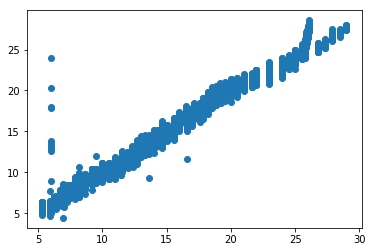

In [35]:
plt.scatter(test_y,lr_predictions)

# Grid Search for Hyperparameter Tuning

In [39]:
# Linear Regression Params
fit_intercept : bool
normalize : bool
params = {"fit_intercept":[True, False], "normalize" : [True, False]}
grid = list(ParameterGrid(params))
result = [] # This result will contain the results for 5 cross validations per param combination created by ParameterGrid
for param in grid :
  result.append(cross_validate(LinearRegression(param),crossValidationSet, test_x, test_y))
  

In [40]:
print("Result of" , grid[0] , "hyper parameters is")
pprint(result[0])

Result of {'fit_intercept': True, 'normalize': True} hyper parameters is
{'test': {'mse': [0.1698112065600141,
                  0.17016675624834704,
                  0.17040705118091048,
                  0.17041375695192681,
                  0.16986147370968577],
          'score': [0.9911237493751192,
                    0.9911051643346664,
                    0.9910926038088417,
                    0.9910922532895481,
                    0.9911211218464199]},
 'train': {'mse': [0.6208859245769757,
                   0.6190474298404982,
                   0.6212558377808493,
                   0.6215715301133878,
                   0.6209948871764567],
           'score': [0.967585001034227,
                     0.967664706426613,
                     0.9675733370828438,
                     0.9675387392315891,
                     0.9675694609489595]},
 'val': {'mse': [0.6228163205996154,
                 0.6301052221871161,
                 0.6213675929602298,
                 0


# Random Forest

In [13]:
rf = RandomForestRegressor() # Init
rf.fit(train_x, train_y) # Train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Random Forest Regressor Score and MSE
1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [14]:
# MSE on training set
print("Training Set Score Random Forest  :", rf.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Random Forest  :", rf.score(val_x, val_y))

# MSE on test set
print("Test Set Score Random Forest  :", rf.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Random Forest :", mean_squared_error(train_y, rf.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Random Forest :", mean_squared_error(val_y, rf.predict(val_x)))

# MSE on test set
print("Test Set MSE Random Forest :", mean_squared_error(test_y, rf.predict(test_x)))

Training Set Score Random Forest  : 0.9997763252087495
Validation Set Score Random Forest  : 0.998783134402813
Test Set Score Random Forest  : 0.9936724814378314
Training Set MSE Random Forest : 0.004265135697443644
Validation Set MSE Random Forest : 0.022514015478263358
Test Set MSE Random Forest : 0.12105151228615302


# 5 Fold Cross Validation

In [15]:
rf_cv_result = cross_validate(RandomForestRegressor(), crossValidationSet, test_x, test_y)
pprint(rf_cv_result)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'test': {'mse': [0.0977526281999102,
                  0.09797825979186497,
                  0.09330910188764954,
                  0.09865825302156833,
                  0.09530758674924877],
          'score': [0.994890344137349,
                    0.9948785500832366,
                    0.9951226129846467,
                    0.9948430059607235,
                    0.995018149605221]},
 'train': {'mse': [0.004271817596003846,
                   0.004069612334458036,
                   0.004337291337972447,
                   0.0043104994616014174,
                   0.004876417912105869],
           'score': [0.999777159370181,
                     0.9997876399343822,
                     0.9997735412403471,
                     0.9997751544143901,
                     0.9997454100688877]},
 'val': {'mse': [0.018628223493236024,
                 0.023824317984711896,
                 0.02135315777118441,
                 0.018497139833607675,
                 0.01847559982212947]

In [18]:
rf_predictions = rf.predict(test_x)

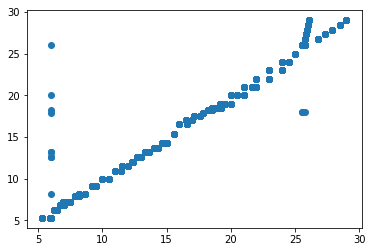

In [19]:
plt.scatter(test_y,rf_predictions)

# Grid Search for Hyperparameter Tuning

In [48]:
# Random Forest Regression Params
# n_estimators : [1, 10, 50, 100] This can be any value, but choosing these three for faster computation.
# max_depth : [1, 10, 20]  This can be any value, but choosing these three for faster computation.
# More params here : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
params = {"n_estimators" : [1, 10, 100], "max_depth" : [1, 10, 20]}
grid = list(ParameterGrid(params))
result = [] # This result will contain the results for 5 cross validations per param combination created by ParameterGrid
for param in grid :
  print(param)
#   result.append(cross_validate(RandomForestRegressor(*param),crossValidationSet, test_x, test_y))

{'max_depth': 1, 'n_estimators': 1}
{'max_depth': 1, 'n_estimators': 10}
{'max_depth': 1, 'n_estimators': 100}
{'max_depth': 10, 'n_estimators': 1}
{'max_depth': 10, 'n_estimators': 10}
{'max_depth': 10, 'n_estimators': 100}
{'max_depth': 20, 'n_estimators': 1}
{'max_depth': 20, 'n_estimators': 10}
{'max_depth': 20, 'n_estimators': 100}


# Neural Net - Multi Layer Perceptron

In [46]:
nn = MLPRegressor() # Init
nn.fit(train_x, train_y) # Train

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

# Multi Layer Perceptron Score and MSE. 
1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [47]:
# MSE on training set
print("Training Set Score Multi Layer Perceptron :", nn.score(train_x, train_y))

# MSE on validation set
print("Validation Set Score Multi Layer Perceptron :", nn.score(val_x, val_y))

# MSE on test set
print("Test Set Score Multi Layer Perceptron :", nn.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Multi Layer Perceptron :", mean_squared_error(train_y, nn.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Multi Layer Perceptron :", mean_squared_error(val_y, nn.predict(val_x)))

# MSE on test set
print("Test Set MSE Multi Layer Perceptron :", mean_squared_error(test_y, nn.predict(test_x)))

Training Set Score Multi Layer Perceptron : 0.8960187387824099
Validation Set Score Multi Layer Perceptron : 0.8562651868009161
Test Set Score Multi Layer Perceptron : 0.8453298472727778
Training Set MSE Multi Layer Perceptron : 1.9827633977212646
Validation Set MSE Multi Layer Perceptron : 2.6593305099676865
Test Set MSE Multi Layer Perceptron : 2.958988695047547


In [20]:
nn_predictions = nn.predict(test_x)

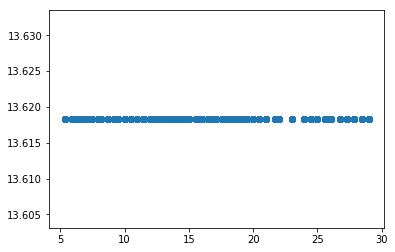

In [21]:
plt.scatter(test_y,nn_predictions)